In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("car.csv")
data.head()

,buying,maint,doors,persons,lug_boot,safety,Unnamed: 6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      1728 non-null   object
 1   maint       1728 non-null   object
 2   doors       1728 non-null   object
 3   persons     1728 non-null   object
 4   lug_boot    1728 non-null   object
 5   safety      1728 non-null   object
 6   Unnamed: 6  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
data.tail()

,buying,maint,doors,persons,lug_boot,safety,Unnamed: 6
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [5]:
data['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [6]:
latest_persons = 'more'
data[data['persons']==latest_persons]

,buying,maint,doors,persons,lug_boot,safety,Unnamed: 6
18,vhigh,vhigh,2,more,small,low,unacc
19,vhigh,vhigh,2,more,small,med,unacc
20,vhigh,vhigh,2,more,small,high,unacc
21,vhigh,vhigh,2,more,med,low,unacc
22,vhigh,vhigh,2,more,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [30]:
unique_doors = data[data.buying=='vhigh']['doors'].unique()
unique_doors.sort()
unique_doors

array(['2', '3', '4', '5more'], dtype=object)

In [31]:
doors_buying_case = []
for i in unique_doors:
  doors_buying_case.append(data[data.buying=='vhigh'][data['doors']==i][data['persons']==latest_persons].buying.count())

C:\Users\MP25B\AppData\Local\Temp\ipykernel_21836\2775018213.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  doors_buying_case.append(data[data.buying=='vhigh'][data['doors']==i][data['persons']==latest_persons].buying.count())


In [32]:
print(set(zip(unique_doors, doors_buying_case)))

{('4', 36), ('3', 36), ('2', 36), ('5more', 36)}


In [22]:
nan_indices = []
for i in range(len(unique_doors)):
  if type(unique_doors[i])=='5more':
    nan_indices.append(i)

In [23]:
unique_doors = list(unique_doors)
doors_buying_case = list(doors_buying_case)

In [24]:
for i in nan_indices:
  unique_doors.pop(i)
  doors_buying_case.pop(i)

unique_doors

['2', '3', '4', '5more']

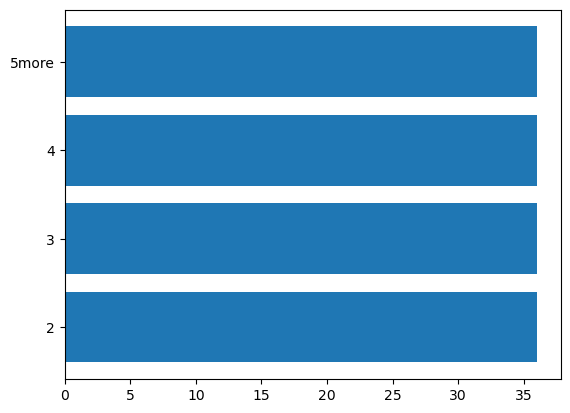

In [25]:
plt.barh(unique_doors, doors_buying_case)
plt.show()

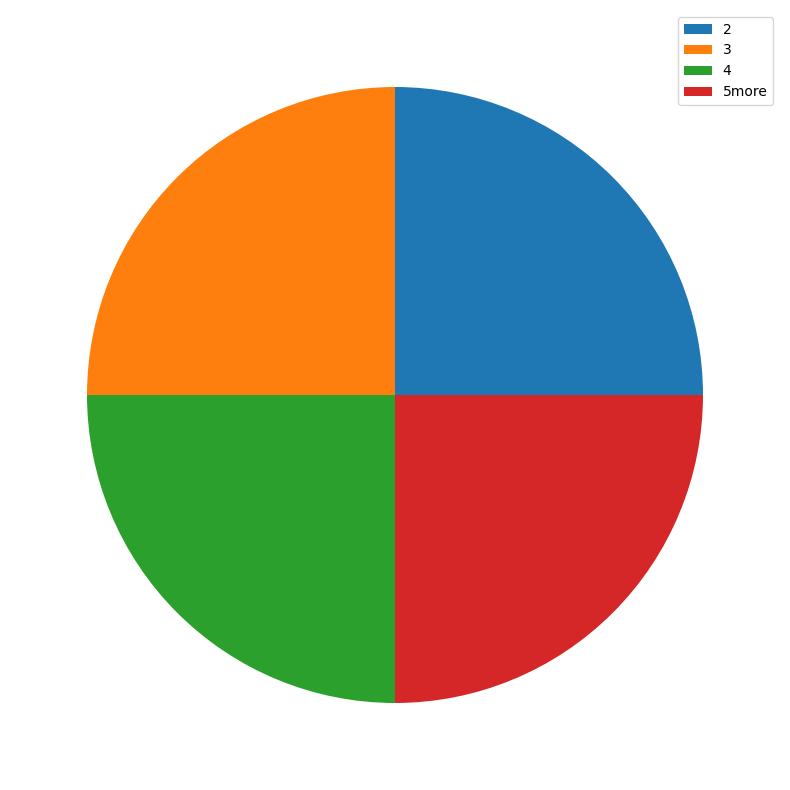

In [26]:
plt.figure(figsize=(10,10))
plt.pie(doors_buying_case)
plt.legend(unique_doors, loc='best')
plt.show()